## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [133]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


minimum_rm = 3.561 maximum_rm= 8.398
minimum_lstat= 1.98 maximum_lstat= 37.97
minimum_ptratio= 12.6 maximum_ptratio= 22.0
minimum_medv= 105000.0 maximum_medv= 1024800.0


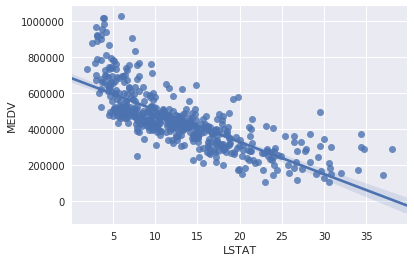

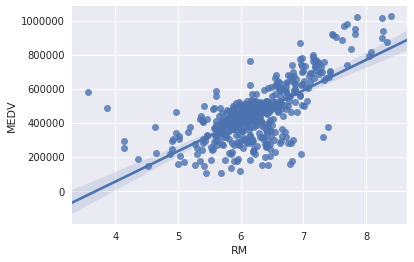

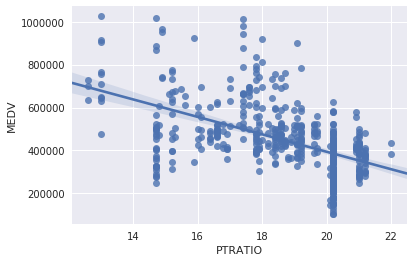

-------------------------Polynomial Regression --------------------------


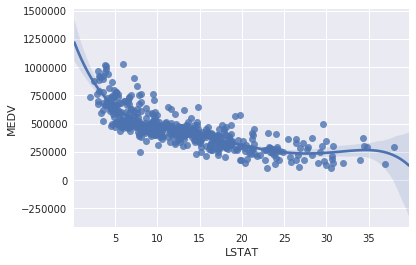

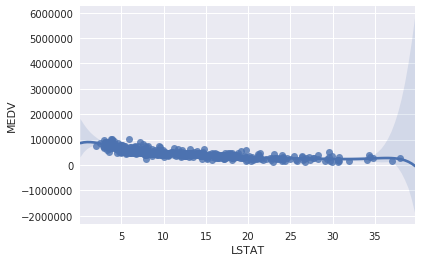

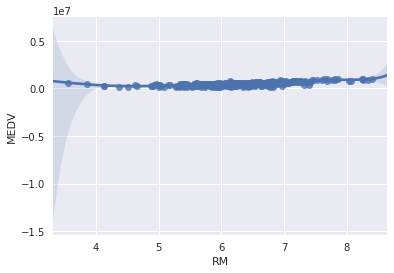

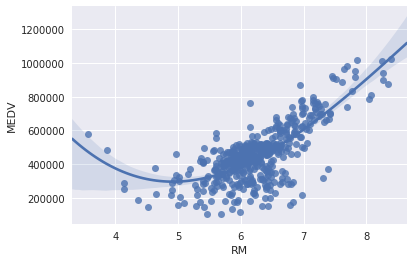

In [160]:
## Data Exploration
#In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

#Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.
#print (data)
#print (data)

print ("minimum_rm =", data['RM'].min() ,"maximum_rm=",data['RM'].max())
print ("minimum_lstat=", data['LSTAT'].min() , "maximum_lstat=", data['LSTAT'].max())
print("minimum_ptratio=", data['PTRATIO'].min(), "maximum_ptratio=", data['PTRATIO'].max())
print("minimum_medv=", data['MEDV'].min(), "maximum_medv=", data['MEDV'].max())


fig = plt.figure(figsize=(30,30))

'''
ax = fig.add_subplot(1,3,1)
ax1 = fig.add_subplot(1,3,2)
ax2 = fig.add_subplot(1,3,3)
ax.plot(data['PTRATIO'], data['MEDV'], 'ro')
ax1.plot(data['RM'], data['MEDV'], 'ro')
ax2.plot(data['LSTAT'], data['MEDV'], 'ro')
'''


'''
Initial inferences:
----------------------
RM:
-----
If RM increases the cost increases , when I plotted RM as X axis and MEDV as Y axis
(RM value range = 5.5 - 6.5  has MEDV = 300000 - 500000)

Majority of the population opts for the range 300000 - 500000 

LSTAT:
-------
If LSTAT increases the cost decreases  most of the data points are having the range of LSTAT (5-17)
has MEDV of (250000- 500000)


------------------------------------------------

#ax.plot(data['PTRATIO'], data['MEDV'], 'ro')

PTRATIO seems not so predictable from the graphs 
It may be asscociated with other parameters, may be a dependent parameter
'''

#ax.plot(data['RM'], data['MEDV'],'ro')
#ax1.plot(data['LSTAT'], data['MEDV'], 'ro', color='green')

'''
xs = data['RM'][0:244]
ys = data['LSTAT'][0:244]
zs = data['MEDV'][0:244]
ax.scatter(xs, ys, zs, c='r', marker='o')
xt = data['RM'][244:488]
yt = data['LSTAT'][244:488]
zt = data['MEDV'][244:488]
ax.scatter(xt, yt, zt, c='b', marker='^')
'''

'''
for c, m, zlow, zhigh in [('r', 'o', 0, 244), ('b', '^', 245, 488)]:
    xs = data['RM']
    ys = data['LSTAT']
    zs = data['MEDV']
    ax.scatter(xs, ys, zs, c=c, marker=m)
'''
'''
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
'''
plt.show()

sns.regplot(data['LSTAT'],data['MEDV'])
plt.show()
sns.regplot(data['RM'],data['MEDV'])
plt.show()
sns.regplot(data['PTRATIO'],data['MEDV'])
plt.show()


print ("-------------------------Polynomial Regression --------------------------")



sns.regplot(data['LSTAT'],data['MEDV'], scatter=True, order=5)
plt.show()

sns.regplot(data['LSTAT'],data['MEDV'], scatter=True, order=8)
plt.show() 
#overfitting 

sns.regplot(data['RM'],data['MEDV'], scatter=True, order=8)
plt.show() 
# overfitting RM

sns.regplot(data['RM'],data['MEDV'], scatter=True, order=3)
plt.show() 
# overfitting RM



### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [135]:
# TODO: Minimum price of the data
minimum_price = data['MEDV'].min()

# TODO: Maximum price of the data
maximum_price = data['MEDV'].max()

# TODO: Mean price of the data
mean_price = data['MEDV'].mean()

# TODO: Median price of the data
median_price = data['MEDV'].median()

# TODO: Standard deviation of prices of the data
std_price = data['MEDV'].std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price)) 
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))



Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer:**
After, performing analysis on the given housing.csv and by using own intuition and thoughts the following answer is arrived at.

**'RM' (The average number of rooms in the neighbour hood)**
________________________________

 From the data exploration performed above, when RM increases the cost increases.The reason for this, when there are more rooms on an average per household then that means lot of free space thereby allowing the buyers to have lot of amenities. For performing this analysis , the other factors are ignored or not considered.

**Would you expect a home that has an 'RM' value(number of rooms) of 6 be worth more or less than a home that has an 'RM' value of 7?**

 I would expect a 7 ROOM home to cost more than 6 room home and would also take into account the overall carpet area of the house.If the carpet area of a 6 Room home is more than 7 room house then the cost of that home will have to be more.But the area is not a parameter for the analysis , so the 7 room home will technically cost more than a 6 room home.

**'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).**
___________________________________________________________________

 From the analysis performed, when the '`LSTAT`' increases the cost of the house decreases. The reason for this is the percentage of lower class people in the neighbourhood.  The number of lower class people in the society leads to a higher income divide between the rich and the poor thereby leading to high crime rates , discriminiation issues. It is not uncommon that if the LSAT is more denoting (90%) of the society belongs to the poor household, the home price will be less in that area. Also, such neighbourhoods are attract less high income population to buy houses in such areas.

**Would you expect a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an 'LSTAT' value of 20?**

 I would prefer to live in an area which has less percent of lower class workers. 15% neighbourhood will have higher house prices than the 20% neighborhood but from the analysis graphs the cost is moreover the same.
     

**`'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.**
 ____________________________________________
 
 From the observation above, the MEDV is not positively or negatively affected by the PTRATIO. But, however PTRATIO depends on the other factor / parameter (LSTAT). 
    
 High teachers to students ratio here denotes, more students to one teacher will have some constraints on education of the students of the area thereby have less attention from the home buyers.
 High PTRATIO will have lower home prices.
    
  Also, it depends on the factor LSTAT. From the analysis , the homes which has high PTRATIO and high LSTAT will have the lowest home prices. 
    
  RM doesnt seem to affect the results, If I have a RM > 8 house in LSTAT neighbourhood with high PTRATIO it will be for sure sold for a lesser price, than in neighbourhood with lower LSTAT population and low PTRATIO.
    
    
**Would you expect a neighborhood that has an 'PTRATIO' value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an 'PTRATIO' value of 15?**

  I would expect, a neighbourhood that has a PTRATIO 10 to cost more than PTRATIO 15, but it also depends on the other factors:
    If the neighbourhood has high percentage population of LSTAT then, I would expect the house prices to be lower 
    IF the neighbourhood has lower percentage populaiton of LSTAT then, It will depend on the RM 
 
_____________________________________________________________________ 
 **Observations:**
 
 1) Higher the RM higher the house prices 
 
 2) Higher the LSTAT lower the house prices
 
 3) Lower the PTRATIO higher the house prices (general)  but it can alone not determine the cost.
 
 4) Lower the PTRATIO and higher the LSTAT -- lower the house prices ( doesnt depend on RM)     
 
 5) Lower the PTRATIO and lower the LSTAT -- higher the house price for higher RM and slightly lower prices for less RM
 
 

        

 
    


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, t
tify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [136]:
from sklearn.metrics  import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)  
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [137]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

After going through, the link provided [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination),

R<sup>2</sup> of 0.923 means 92.3% of the variance is Y (target)  is predictable from X (actuals).  This is a high R<sup>2</sup> (coefficient of determination) so I would consider the model to have captured the variations in the target and it is good for the given dataset.


R<sup>2</sup>= { ( 1 / N ) * Σ [ (xi - x) * (yi - y) ] / (σx * σy ) }<sup>2</sup>
    
This depends on the number of Observations, say we have a huge dataset having differences the  R<sup>2</sup> value will be lesser or negative. from the analysis, it is clear that the model performs well for the given dataset.
    
    
    







### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [138]:
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20,random_state=10)

# Success
print("Training and testing split was successful.",'X_TRAIN=',  round((len(X_train)/len(features))*100,1) ,'%'
      , 'Y_TRAIN=', round((len(y_train)/len(features))*100,1) ,'%'
      , 'X_TEST=',  round((len(X_test)/len(features))*100,1),'%'
      , 'Y_TEST=',  round((len(y_test)/len(features))*100,1),'%')

Training and testing split was successful. X_TRAIN= 80.0 % Y_TRAIN= 80.0 % X_TEST= 20.0 % Y_TEST= 20.0 %


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer:**


The problem is a Regression problem , the value of the house changes based on changing factors 
__________________________________________________________________________________
    Detailed reformed steps  while learning the course are listed as below:
    1) Get the dataset , perform the analysis on the dataset
    2) Load the dataset using numpy and pandas 
    3) split the dataset to training and the test set  
    GOLDEN RULE : never use the test sets for training.
    4) Choose a classifier algorithm for training  
    5) Train the model using the training set 
    6) predict using the test set 
    7) calculate the precision , accuracy , recall score , F1 score , F1 (Beta) score , ROC 
    8) Analyse the overfitting and underfitting using cross validation 
    
    
    
  **Inferences:**
  ___________________________________________________
  
  If  the same dataset is used, for training and testing  then it will lead to very high accuracy in prediction.
    The main aim of the machine learning algorithms are to predict the random data input which is not known to the system.
    
 **TRAINING ERROR AND TEST ERROR:**
 _________________________________________________
    
   1) Training Erorr is the prediction errors encountered on using the same input from the training data. If we try to minimize the training error so much then the model will lead to overfitting 
   2) Test error is the prediction errors encountered on using a non conforming or disjoint dataset.
 The K FOLDS Cross validation and Cross validation to ensure the model correctness by dividing the data in to K Buckets.
    
 **RULES:** 
_______________________________________________________
The model has to perform well for random data inputs, in order to detect the model's prediction level. using various calculation scores , ROC , F1 scores we arrive at conclusions about the models performance.
The purpose is to deduce how good the model is able to perform for the data inputs which it has never encountered before during training.so allocating a part of the input data as a test set that is independent of the training set and use the training set to train the model.
        
  
**Conclusion:**
_____________________________
  It is necessary to have data in 3 disjoint sets to accurately measure the training and the test error.
  we take the average of scores from the test errors and accuracy and deem it as model prediction accuracy.
        
        
        
        
        


----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

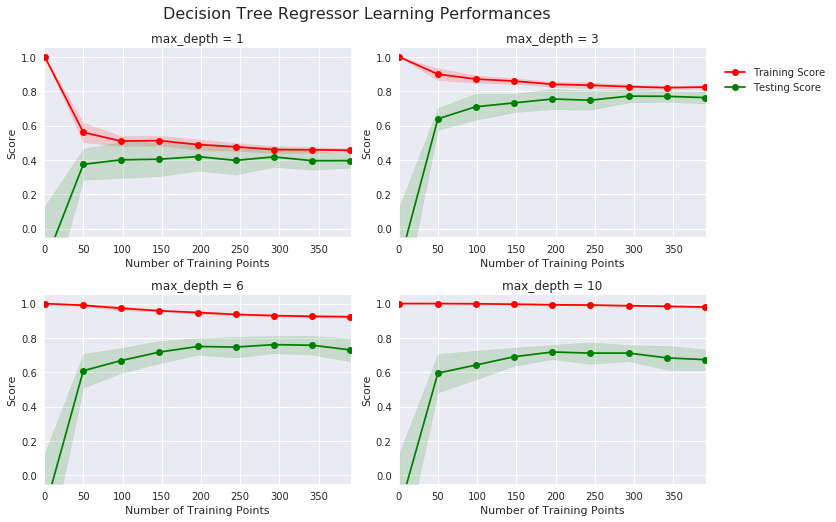

In [139]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer:**
Analysing the graphs for the Decision tree Regressor performances for various depths the following conclusion is arrived at:

The graphs are analyzed  the overfitting, underfitting problems 

**1) MAX_DEPTH=1 (under fitting and highly inaccurate)**
_________________________________________________________

 For max_depth =1 (maximum depth  =1 )  the training score **decreases** when the number of data points increases, when the model starts to learn the score goes down and atlast to 0.5 when the data_points > 350 
    This means the the model doesnt not fit the data properly and it has very low accuracy of 40-50%
    **This model with maximum depth = 1 doesnt fit the data and can be deemed as underfitting (High bias Scenario)**
    The testing score is much  than the training score, so the model is able to predict only 40% of the test results properly and it is unable to act on the unseen or new results accurately 
    **This is a poor model having converging scores at 0.4 which has low complexity and high bias in prediction**
    
**2) MAX_DEPTH=3 (good fitting and low variance)**
________________________________________________________
 
For max_depth=3 (maximum depth  = 3 ) the training score decreases when it starts learning but the training_score is 80% when it stops changing after > 350 data points.
    The training score seems to be 0-7-0.8 (70-80%) for the data_points(200-350)
    This model seems to fit the data to a very good extent 
    The training and the test score seems to converge at ~0.8  and the variance is also minimal 
 **This model seems to fit the data to a good extent and also predicts the new data and converge more over at the same score This is the ideal model to be used**
    
**3) MAX_DEPTH=6 (overfitting and high variance)**
________________________________________________________
    
 For max_depth = 6  ( maximum depth = 6 )  The training score is 0.9 and the training score has less variance and it seems to overfit the data and the model is a complex model.
    The testing score is converging at 0.7 which is not a bad prediction score but due to the variance between the training and the test scores and moderate variance in convergence it is not "the best model"
    
    
    
**4) MAX_DEPTH=10 (overfitting)**
________________________________________________________

  For max_depth = 10 ( maximum depth =10 ) The training score is always > 0.9 this meand the training data set is overfit by the complex model.
    The Gap in convergence between the training and the test scores definitely denote it is not a good model to choose.
      

    
    



### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

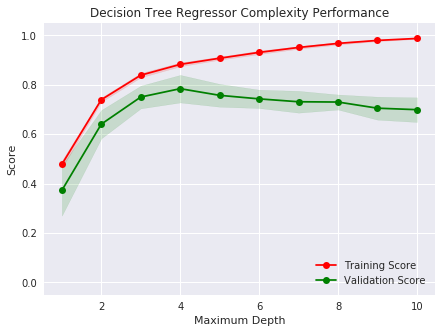

In [140]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer:**

**When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?**
____________________________________
From the learnings and the analysis performed on the graph in case of the high bias scenario the  convergence happens at a very low score and there is a very little variance between the training and the test scores. This may result in underfitting of the trained data as well as incompetence of the model to predict the scenarios from the test data used.


**The model trained with a maximum_depth =1 is a primitive model sufferring from the High bias scenario.Due to the convergence score of training and test which is 0.4 and it has less variance / convergence gap.**


**How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?**
_______________________________________
For the high variance scenario the convergence gap between the testing and the training score will be higher.
This scenario happens when the model is complex but it overfits the data under training but it is not able to predict accurately using the information from the testing set.

**The model trained with maximum_depth=10 is a highly complex model sufferring from High variance scenario.Due to the high convergence gap between  the training and the testing scores the model will not be generalize or be able to predict the outcomes from different test sets**




### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer:**
**Which maximum depth do you think results in a model that best generalizes to unseen data?**
__________________________________________
The model complexity graph above is taken in to account to deduce the best model 
There are two possible results  depth = 3 and 4 
maximum depth = 3 training_score = 0.8 and test_score = 0.7 
maximum_depth = 4 training_score = 0.85 and test_score ~=0.8

After model having maximum_depth = 4 the variance or the convergence gaps seems to increase and the test score begins to drop 

conclusion:
------------
so the model having *maximum_depth=4* is chosen as the best model for solving the problem





-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer:**

**What is the grid search technique?**
    The Grid Search technique is used to identify the best among the defined  set of hyper parameters denoting the highly efficient model.
    The hyper parameters in this case is the maximum depth 
    For a gridSearch algorithm if we input the '`hyper_parameters =[1,3,6,10]`' which is the maximum depth then the algorithm will return the hyper_parameter with the high F1 score and the model can be chosen as the best model 
   The GridSearchCV searches for tries 1 , 3, 6 ,10 and chooses the best model = 3 out of the options provided 
   The optimization solely depends on the hyper_parameters we provide.
   We can find the highest accuracy of cross validation and the hyper parameters that can be used to tune using the GridSearchCV
   
https://scikit-learn.org/stable/modules/grid_search.html -- the other algorithms are listed in the scikit 

   
   

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer:**

**What is k-fold cross validation training technique?**
The cross validation principle is to validate the model performance on a limited randomized set of data.
In cross validation scenarios , the data is split in to 3 or more equal datasets 
    1. training data 
    2. test data
    3. cross validation data
In k-fold validation the data is split in to k equal size buckets and used for validation. 

The data is technically, shuffled  Randomly and split in to k  buckets of a specific size and used for cross validation. One bucket  is then used once as a validation bucket  while the k - 1 remaining buckets  are used as training sets.

There are several variations of Kfold algorithms 

`StratifiedKFold`

(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)

- StratifiedKFold preserves the percentage data similarity between the folds / buckets (grouped data) 


`RepeatedKFold`

(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html#sklearn.model_selection.RepeatedKFold)

- RepeatedKFold repeats the Kfold algorithm of K buckets with different randomizations.


`RepeatedStratifiedKFold`

(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html#sklearn.model_selection.RepeatedStratifiedKFold)


**What benefit does this technique provide for grid search when optimizing a model?**
______________

The GridSearch is used to choose the best hyper parameters and the efficient model. In order for the grid search to perform accurately we should evaluate by using the score function and choose the best hyper parameters. If we use only test ,training  set  and only one cross validation set. The score function results  will be fluctuating and it will be based on one random set of data. It is best to take multiple sets and take average of all the sets in order to deduce the best hyper parameter 
If the hyper parameter has the best scores for more than one dataset it will be then chosen as the best fit.






### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [141]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 10)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #params = {'max_depth':numpy.arange(1,10,1)}
    #params  = { 'max_depth':range(1,11)}
    depth_arr=[1,2,3,4,5,6,7,8,9,10]
    params = dict( max_depth=depth_arr)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [142]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model_alternative(X, y,depth_arr):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #params = {'max_depth':numpy.arange(1,10,1)}
    #params  = { 'max_depth':range(1,11)}
    #depth_arr=None
    params = dict( max_depth=depth_arr)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [143]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)
# Produce the value for 'max_depth'
#print(reg.__dict__)
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

for i in range(1,11):
    depth_arr = []
    depth_arr.append(i)
    reg=fit_model_alternative(X_train,y_train, depth_arr)
    print ("Score for the depth = ", i , " is = ", round(reg.best_score_,2)*100 ,"%")
    
    
    


Parameter 'max_depth' is 4 for the optimal model.
Score for the depth =  1  is =  37.0 %
Score for the depth =  2  is =  64.0 %
Score for the depth =  3  is =  75.0 %
Score for the depth =  4  is =  78.0 %
Score for the depth =  5  is =  75.0 %
Score for the depth =  6  is =  73.0 %
Score for the depth =  7  is =  75.0 %
Score for the depth =  8  is =  71.0 %
Score for the depth =  9  is =  70.0 %
Score for the depth =  10  is =  69.0 %


** Hint: ** The answer comes from the output of the code snipped above.

**Answer:**
The model chosen has the depth = 4 this matches with my inference in the Q6 
Also I have listed the individual scores by writing a small snippet and only by passing a single depth to the alternative function.
we can note that depth 4 has the highest score of 0.78 so it is chosen as the best model.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [144]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $387,800.00
Predicted selling price for Client 2's home: $277,200.00
Predicted selling price for Client 3's home: $789,600.00


In [128]:
pd.options.display.float_format = '${:,.2f}'.format
print(prices.describe(include =all))
pd.options.display.float_format = '{:,.2f}'.format
print(data['PTRATIO'].describe())
print(data['RM'].describe())
print(data['LSTAT'].describe())

count         $489.00
mean      $454,342.94
std       $165,340.28
min       $105,000.00
25%       $350,700.00
50%       $438,900.00
75%       $518,700.00
max     $1,024,800.00
Name: MEDV, dtype: float64
count   489.00
mean     18.52
std       2.11
min      12.60
25%      17.40
50%      19.10
75%      20.20
max      22.00
Name: PTRATIO, dtype: float64
count   489.00
mean      6.24
std       0.64
min       3.56
25%       5.88
50%       6.18
75%       6.58
max       8.40
Name: RM, dtype: float64
count   489.00
mean     12.94
std       7.08
min       1.98
25%       7.37
50%      11.69
75%      17.12
max      37.97
Name: LSTAT, dtype: float64


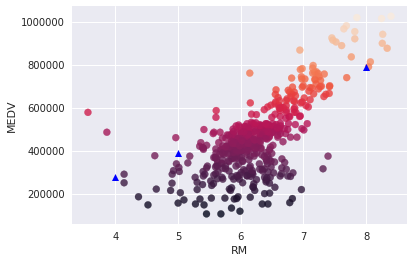

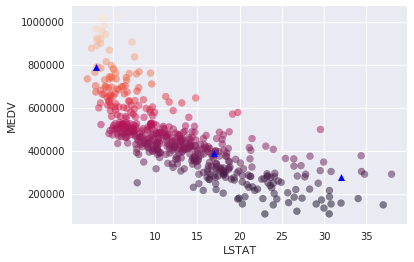

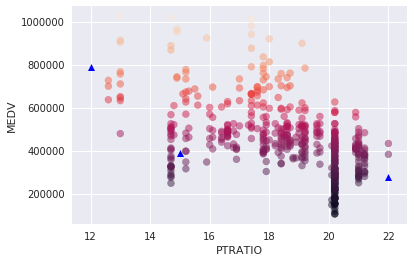

In [159]:
from matplotlib import pyplot as plt

clients = np.transpose(client_data)
predictor = reg.predict(client_data)

plt.scatter(data['RM'], prices, alpha=0.8, c=prices)
plt.scatter(clients[0], predictor, color='blue', marker='^', linewidths=0)
plt.xlabel('RM')
plt.ylabel('MEDV')

plt.show()

plt.scatter(data['LSTAT'], prices, alpha=0.50, c=prices)
plt.scatter(clients[1], predictor, color='blue', marker='^', linewidths=0)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

plt.scatter(data['PTRATIO'], prices, alpha=0.50, c=prices)
plt.scatter(clients[2], predictor, color='blue', marker='^', linewidths=0)
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')


plt.show()


**Answer:**
From the 
For the client 1 : RM =5 LSTAT = 17 and PTRATIO = 15 , the price seems to be reasonable as the LSTAT population is slightly higher it but the PTRATIO is lower so it is a reasonabl price it falls below the mean of $454,342.94 because LSTAT > 15 the price is considerably lower eventhough the PTRATIO = 15 

For client 2: LSTAT = 32 and PTRATIO = 22 and RM =4 so it should be around minimum amount + (standard deviation) it is a reasonable price 

for client 3: LSTAT =3 and PTRATIO=12 and RM=8 so it will be the of higher cost , the predicted amount seems reasonable.



### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [145]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $422,100.00
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $379,125.00

Range in prices: $42,975.00


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer:**
**How relevant today is data that was collected from 1978? How important is inflation?**

The data collected back in 1978 without the inflation adjustment is not relevant anymore  in 2019 
The population has increased and there is lot of movement and infrastructure changes 

**Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?**

The dataset is a primitive dataset with this we cannot predict the cost of the house using only 3 parameters
yes we can consider Location , construction materials used, age of the house, carpet area , utilities, pool , applicances , 
security systems etc 

**Is the model robust enough to make consistent predictions?**

Yes the model is able to make consistent predictions with a high score and with a range of test data the results are with in the expected range and with less deviation 

**Would data collected in an urban city like Boston be applicable in a rural city?**

No the urban infrastructure is different from the rural infrastructure and the income in rural cities are far more lesser than the urban ones.  more parameters like proximity to the transportation ( bus_stations , train_stations) must be taken in to account while prediction 

**Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?**

Yes , If it is a good neighbourhood the amenities , connectivity and facilities will be more and it will be safe for all age groups. Some abandoned and highly risk areas will receive less interests from potential home buyers because of the safety issues and the problems that comes along with it.





> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.